
# Solución Práctica 2 Redes Neuronales Convolucionales

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.7.0


## Datos digits MNIST

In [2]:
casos = 3
#####
neuronas_capa_1_convolucional = [32, 64, 64]
ventana_capa_1_convolucional = [5, 7, 7]
funcion_activacion_capa_1 = ['relu','relu','relu']
padding_capa_1 =['', 'same', 'same']
ventana_capa_1_poooling = [2, 2, 2]
#####
neuronas_capa_2_convolucional = [64, 128, 128]
ventana_capa_2_convolucional = [5, 3, 3]
funcion_activacion_capa_2 = ['relu','relu','relu']
padding_capa_2 =['', 'same', 'same']
ventana_capa_2_poooling = [2, 2, 2]
#####
neurona_penultima_capa_densa = [0, 65, 65]
funcion_activacion_penultima_capa_densa = ['', 'relu', 'relu']
#####
funcion_activacion_ultima_capa_densa = ['softmax', 'softmax' , 
                                        'softmax']
optimizador = ['sgd', 'sgd', 'adam']
funcion_perdida = ['categorical_crossentropy', 
                   'categorical_crossentropy', 
                   'categorical_crossentropy']
metrica = ['accuracy', 'accuracy', 'accuracy']
numero_iteraciones = [5,5,5]
models = []

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

for caso in range(casos):
  model = Sequential()
  model.add(Conv2D(neuronas_capa_1_convolucional[caso], 
                   (ventana_capa_1_convolucional[caso], 
                   ventana_capa_1_convolucional[caso]), 
                   activation = funcion_activacion_capa_1[caso], 
                   input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((ventana_capa_1_poooling[caso], 
                          ventana_capa_1_poooling[caso])))
  model.add(Conv2D(neuronas_capa_2_convolucional[caso], 
                   (ventana_capa_2_convolucional[caso], 
                    ventana_capa_2_convolucional[caso]), 
                   activation=funcion_activacion_capa_2[caso]))
  model.add(MaxPooling2D((ventana_capa_2_poooling[caso], 
                          ventana_capa_2_poooling[caso])))
  model.add(Flatten())
  model.add(Dense(10, 
                  activation=funcion_activacion_ultima_capa_densa[caso]))
  models.append(model)

In [4]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)

In [5]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)


(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [6]:
for caso in range(casos):
  models[caso].compile(loss = funcion_perdida[caso],
              optimizer = optimizador[caso],
              metrics=[metrica[caso]])

In [7]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].fit(train_images, train_labels,
          batch_size=100,
          epochs=numero_iteraciones[caso],
          verbose=1)
  print("\n")

CASO  1
---------------------------------
Epoch 1/5
600/600 [==============================] - 7s 8ms/step - loss: 0.8994 - accuracy: 0.7714
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2446 - accuracy: 0.9283
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1785 - accuracy: 0.9483
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1448 - accuracy: 0.9576
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1236 - accuracy: 0.9639


CASO  2
---------------------------------
Epoch 1/5
600/600 [==============================] - 7s 11ms/step - loss: 1.0110 - accuracy: 0.7478
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.2928 - accuracy: 0.9148
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 0.2065 - accuracy: 0.9403
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.1630 - accuracy: 0.9527
Epoch 5/5
600/600 [

In [8]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9917


In [9]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.09884219616651535
PRECISIÓN CON LOS DATOS DE TEST:  0.970300018787384


CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.11920831352472305
PRECISIÓN CON LOS DATOS DE TEST:  0.9674000144004822


CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.025157010182738304
PRECISIÓN CON LOS DATOS DE TEST:  0.9916999936103821




## Datos Fashion-MNIST

In [12]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [13]:
casos = 5
#####
neuronas_capa_1_convolucional = [32, 64, 64, 32, 32]
ventana_capa_1_convolucional = [5, 7, 7, 5, 5]
funcion_activacion_capa_1 = ['relu','relu','relu', 'relu', 'tanh']
padding_capa_1 =['', 'same', 'same', '', '']
ventana_capa_1_poooling = [2, 2, 2, 2, 2]
#####
neuronas_capa_2_convolucional = [64, 128, 128, 64, 64]
ventana_capa_2_convolucional = [5, 3, 3, 5, 5]
funcion_activacion_capa_2 = ['relu', 'relu', 'relu', 'relu', 'tanh']
padding_capa_2 =['', 'same', 'same', '', '']
ventana_capa_2_poooling = [2, 2, 2, 2, 2]
#####
neurona_penultima_capa_densa = [0, 65, 65, 0, 0]
funcion_activacion_penultima_capa_densa = ['', 'relu', 'relu', '', '']
#####
funcion_activacion_ultima_capa_densa = ['softmax', 'softmax' , 
                                        'softmax', 'softmax', 'softmax']
optimizador = ['sgd', 'sgd', 'adam', 'sgd', 'sgd']
funcion_perdida = ['sparse_categorical_crossentropy', 
                   'sparse_categorical_crossentropy', 
                   'sparse_categorical_crossentropy',
                   'sparse_categorical_crossentropy',
                   'sparse_categorical_crossentropy']
metrica = ['accuracy', 'accuracy', 'accuracy', 'accuracy', 'accuracy']
numero_iteraciones = [5, 5, 5, 25, 5]
models = []

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

for caso in range(casos):
  model = Sequential()
  if (padding_capa_1[caso] == ''):
    model.add(Conv2D(neuronas_capa_1_convolucional[caso], 
                    (ventana_capa_1_convolucional[caso], 
                    ventana_capa_1_convolucional[caso]), 
                    activation = funcion_activacion_capa_1[caso], 
                    input_shape=(28, 28, 1)))
  else:
    model.add(Conv2D(neuronas_capa_1_convolucional[caso], 
                    (ventana_capa_1_convolucional[caso], 
                    ventana_capa_1_convolucional[caso]), 
                    padding = padding_capa_1[caso],
                    activation = funcion_activacion_capa_1[caso], 
                    input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((ventana_capa_1_poooling[caso], 
                          ventana_capa_1_poooling[caso])))
  if (padding_capa_2[caso] == ''):
    model.add(Conv2D(neuronas_capa_2_convolucional[caso], 
                    (ventana_capa_2_convolucional[caso], 
                    ventana_capa_2_convolucional[caso]), 
                    activation=funcion_activacion_capa_2[caso]))
  else:
    model.add(Conv2D(neuronas_capa_2_convolucional[caso], 
                    (ventana_capa_2_convolucional[caso], 
                    ventana_capa_2_convolucional[caso]),
                    padding = padding_capa_2[caso], 
                    activation=funcion_activacion_capa_2[caso]))
  model.add(MaxPooling2D((ventana_capa_2_poooling[caso], 
                          ventana_capa_2_poooling[caso])))
  model.add(Flatten())
  if (neurona_penultima_capa_densa[caso] == 0):
    model.add(Dense(10, 
                    activation=funcion_activacion_ultima_capa_densa[caso]))
  else:
    model.add(Dense(neurona_penultima_capa_densa[caso], 
                    activation=funcion_activacion_penultima_capa_densa[caso]))
    model.add(Dense(10, 
                    activation=funcion_activacion_ultima_capa_densa[caso]))
  models.append(model)

In [18]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (De

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [8]:
for caso in range(casos):
  models[caso].compile(loss = funcion_perdida[caso],
              optimizer = optimizador[caso],
              metrics=[metrica[caso]])

In [9]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].fit(train_images, train_labels,
          batch_size=100,
          epochs=numero_iteraciones[caso],
          verbose=1)
  print("\n")

CASO  1
---------------------------------
Epoch 1/5
600/600 [==============================] - 14s 8ms/step - loss: 1.1765 - accuracy: 0.6154
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6742 - accuracy: 0.7535
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5899 - accuracy: 0.7864
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5409 - accuracy: 0.8049
Epoch 5/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5051 - accuracy: 0.8193


CASO  2
---------------------------------
Epoch 1/5
600/600 [==============================] - 7s 11ms/step - loss: 1.3033 - accuracy: 0.5788
Epoch 2/5
600/600 [==============================] - 6s 10ms/step - loss: 0.7593 - accuracy: 0.7233
Epoch 3/5
600/600 [==============================] - 6s 10ms/step - loss: 0.6593 - accuracy: 0.7599
Epoch 4/5
600/600 [==============================] - 6s 10ms/step - loss: 0.6003 - accuracy: 0.7814
Epoch 5/5
600/600 

In [10]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.3103 - accuracy: 0.8893


In [11]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5016855597496033
PRECISIÓN CON LOS DATOS DE TEST:  0.8241000175476074


CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5815274715423584
PRECISIÓN CON LOS DATOS DE TEST:  0.7926999926567078


CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.3103273808956146
PRECISIÓN CON LOS DATOS DE TEST:  0.8892999887466431




---

In [16]:
predictions = model.predict(test_images)

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

Volvemos las imagenes a formato original para hacer el plot

In [18]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

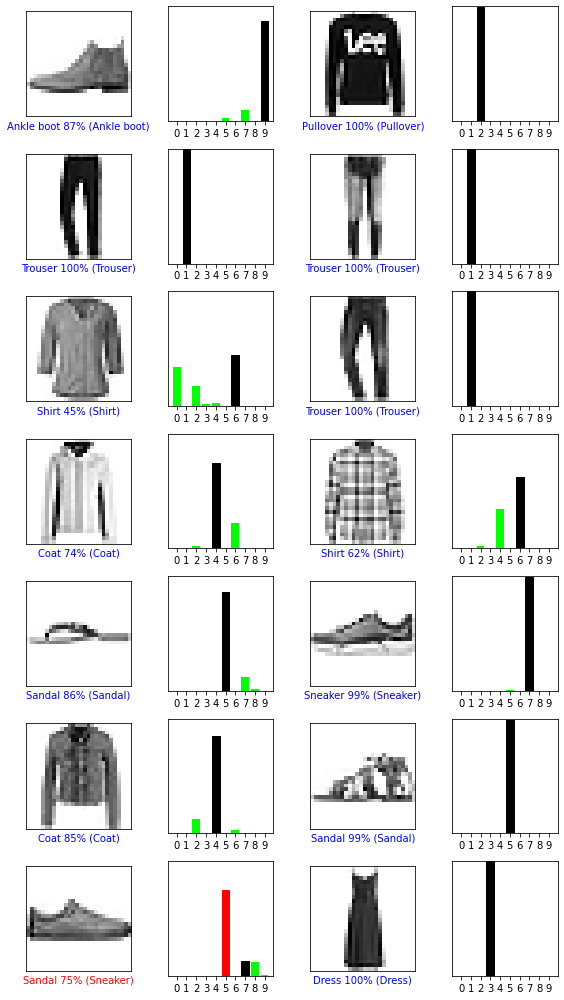

In [19]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [20]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


Modelo 2: Duplicando las neuronas de modelo base y añadiendo una capa densa de 64 neuronas

In [22]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7686 - accuracy: 0.7222
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4992 - accuracy: 0.8183
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4268 - accuracy: 0.8466
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3870 - accuracy: 0.8618
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.3716 - accuracy: 0.8667

Test accuracy: 0.8666999936103821


Modelo 3: modelo 3 cambiando al optimizador 'adam'

In [23]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3994 - accuracy: 0.8548
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2648 - accuracy: 0.9025
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2253 - accuracy: 0.9162
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1941 - accuracy: 0.9275
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2441 - accuracy: 0.9134

Test accuracy: 0.9133999943733215


Modelo 4: Buscando un modelo más complejo que usa capas BathNormalization y Dropout

In [24]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model



In [25]:
model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 47s 24ms/step - loss: 0.5054 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3208 - accuracy: 0.8877
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2713 - accuracy: 0.9046
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2453 - accuracy: 0.9139
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.2687 - accuracy: 0.9043

Test accuracy: 0.9042999744415283


Modelo 5: Modelo anterior añadiendo más epochs (10 epochs)

In [26]:

model = make_model()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.5060 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3172 - accuracy: 0.8879
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2700 - accuracy: 0.9042
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2467 - accuracy: 0.9135
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2251 - accuracy: 0.9200
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2116 - accuracy: 0.9245
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1883 - accuracy: 0.9340
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1758 - accuracy: 0.9372
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1635 - accuracy: 0.9427
Epoch 10/10
313/313 [==============================] - 2s 7ms/st

Modelo 6: Modelo anterior añadiendo más epochs (30 epochs)

In [27]:

model = make_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Epoch 1/30
1875/1875 [==============================] - 45s 23ms/step - loss: 0.5088 - accuracy: 0.8240
Epoch 2/30
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3241 - accuracy: 0.8845
Epoch 3/30
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2807 - accuracy: 0.8999
Epoch 4/30
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2557 - accuracy: 0.9101
Epoch 5/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2272 - accuracy: 0.9200
Epoch 6/30
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2106 - accuracy: 0.9249
Epoch 7/30
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1883 - accuracy: 0.9320
Epoch 8/30
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1797 - accuracy: 0.9357
Epoch 9/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1658 - accuracy: 0.9415
Epoch 10/30
1875/1875 [==============================] - 45s 24m

Modelo 7: Modelo anterior añadiendo más epochs (30 epochs) y diferentes hiperparámetros al optimizador Adam

In [28]:
model = make_model()

optimizer = tf.keras.optimizers.Adam (lr=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model.fit(train_images, train_labels, epochs=30, callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
1875/1875 [==============================] - 47s 24ms/step - loss: 0.5066 - accuracy: 0.8254 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3188 - accuracy: 0.8891 - lr: 9.0000e-04
Epoch 3/30
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2781 - accuracy: 0.9017 - lr: 8.1000e-04
Epoch 4/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2404 - accuracy: 0.9145 - lr: 7.2900e-04
Epoch 5/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2148 - accuracy: 0.9232 - lr: 6.5610e-04
Epoch 6/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1919 - accuracy: 0.9318 - lr: 5.9049e-04
Epoch 7/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1702 - accuracy: 0.9394 - lr: 5.3144e-04
Epoch 8/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1519 - accuracy: 0.9469 - lr: 4.7830e-04
Epoch 9/30
1875/1875 [==============

Visualización de las predicciones del modelo 7

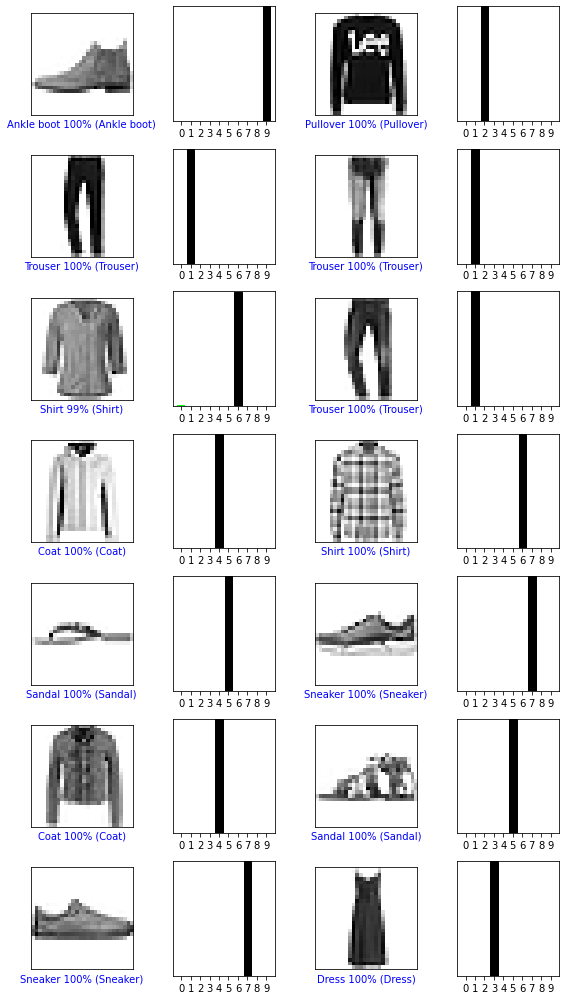

In [29]:

predictions = model.predict(test_images)

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()